# Analyzing CIA Factbook Data Using SQLite and Python

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

population: The population as of 2015.

population_growth: The annual population growth rate, as a percentage.

area: The total land and water area.

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('factbook.db')
cursor = conn.cursor()

q0 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q0, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [2]:
q1 = "SELECT * FROM facts limit 5"

pd.read_sql_query(q1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [3]:
q2 = '''

SELECT MIN(population) as min_pop, MIN(population_growth) as min_pop_growth, MAX(population) as max_pop,
MAX(population_growth) as max_pop_growth
FROM facts
'''

pd.read_sql_query(q2,conn)

,min_pop,min_pop_growth,max_pop,max_pop_growth
0,0,0.0,7256490011,4.02


The results below indicate interesting results. Namely, there is a country with "0" population as well as another with 7.2 billion people. 

We should investigate those two instances.

In [4]:
q3 = '''

SELECT * 
FROM facts 
WHERE population == (SELECT MIN(population) FROM facts)
'''

pd.read_sql_query(q3,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [5]:
q4 = '''

SELECT * 
FROM facts 
WHERE population == (SELECT MAX(population) FROM facts)
'''

pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


It seems this row was used to represent the entire planet's population, explaing the 7.2 billion people represented

C:\Users\mathh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002278A408358>,
      dtype=object)

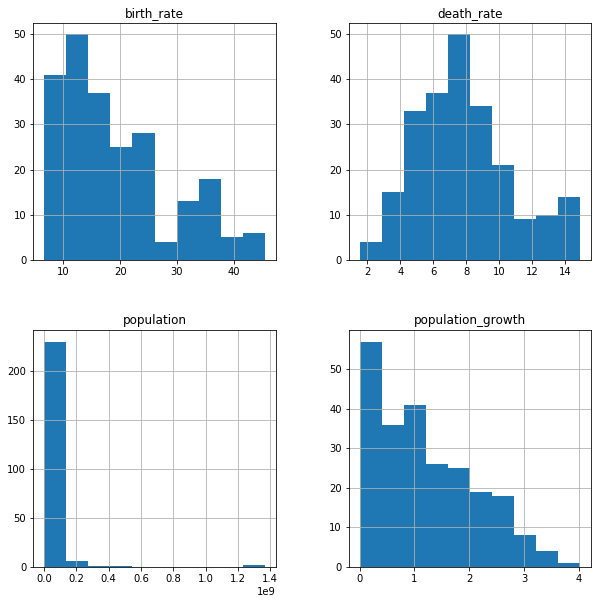

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
q5 = '''

SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE
population != (SELECT MAX(population) FROM facts) and 
population != (SELECT MIN(population) FROM facts)
'''

pd.read_sql_query(q5, conn).hist(ax=ax)

Which countries have the highest population density?

In [7]:
q6 = '''
SELECT name, cast(population as float)/cast(area as float) as density
FROM facts
ORDER BY density desc
LIMIT 10
'''

pd.read_sql_query(q6,conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


Generate a histogram of population densities

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002278AB043C8>],
      dtype=object)

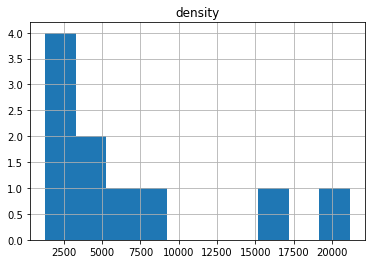

In [8]:
fig = plt.figure()
ax = fig.add_subplot()

pd.read_sql_query(q6, conn).hist(ax=ax)

Which countries have the highest ratios of water to land? Which countries have more water than land?

In [9]:
q8 = '''
SELECT name, cast(area_water as float) / cast(area as float) as "Water to land ratio"
FROM facts
ORDER BY "Water to land ratio"
LIMIT 10
'''

pd.read_sql_query(q8,conn)

,name,Water to land ratio
0,Chad,None
1,New Zealand,None
2,Niger,None
3,South Sudan,None
4,Sudan,None
5,Holy See (Vatican City),None
6,European Union,None
7,Greenland,None
8,French Southern and Antarctic Lands,None
9,Saint Barthelemy,None
